<a href="https://colab.research.google.com/github/IshuRajGupta/DAI-101-Assignment-1/blob/main/DAI_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows:
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7

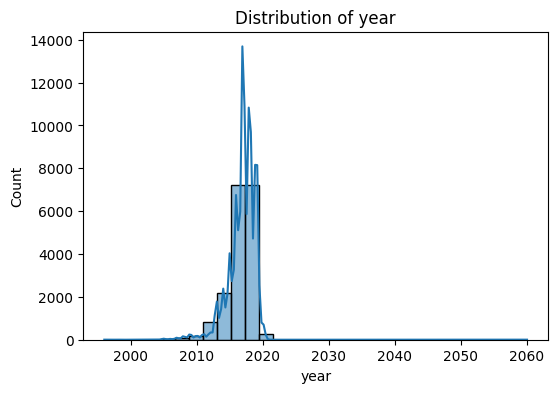


Statistics for price:
count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64


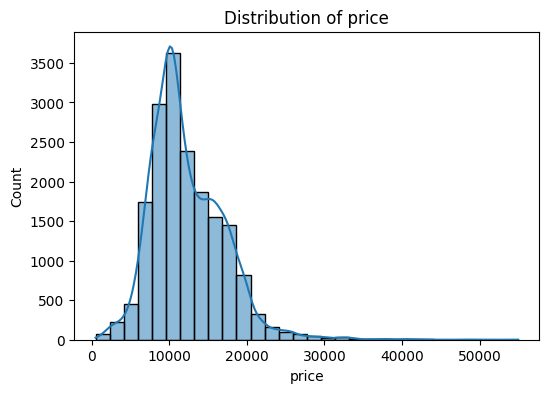


Statistics for mileage:
count     17966.000000
mean      23362.608761
std       19472.054349
min           1.000000
25%        9987.000000
50%       18242.500000
75%       31060.000000
max      177644.000000
Name: mileage, dtype: float64


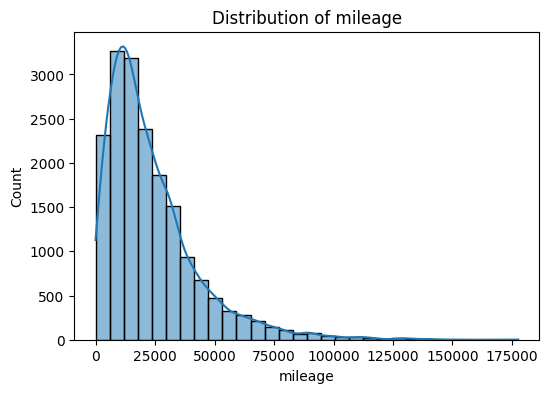


Statistics for tax:
count    17966.000000
mean       113.329456
std         62.012456
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


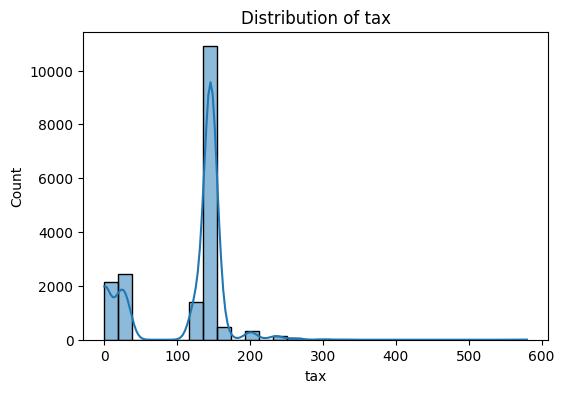


Statistics for mpg:
count    17966.000000
mean        57.906980
std         10.125696
min         20.800000
25%         52.300000
50%         58.900000
75%         65.700000
max        201.800000
Name: mpg, dtype: float64


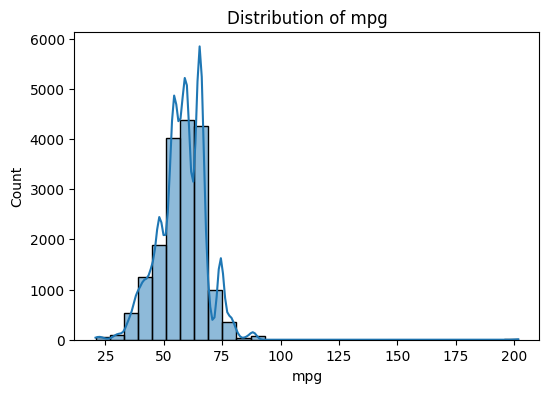


Statistics for engineSize:
count    17966.000000
mean         1.350807
std          0.432367
min          0.000000
25%          1.000000
50%          1.200000
75%          1.500000
max          5.000000
Name: engineSize, dtype: float64


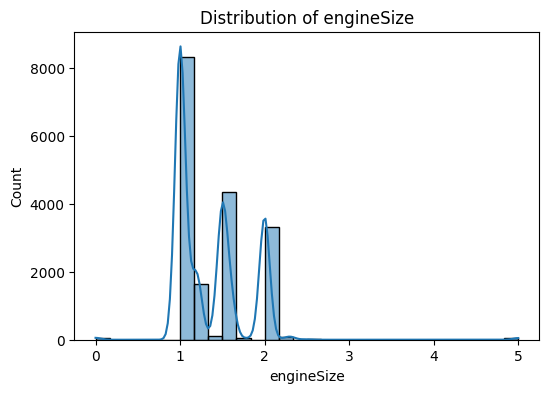


Value Counts for model:
model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64


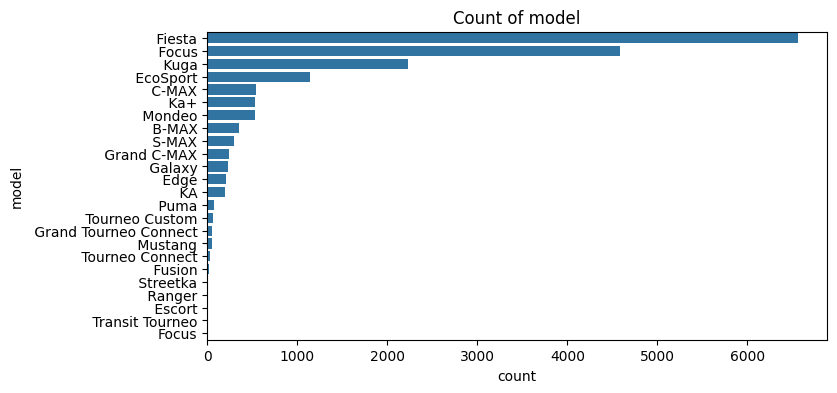


Value Counts for transmission:
transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64


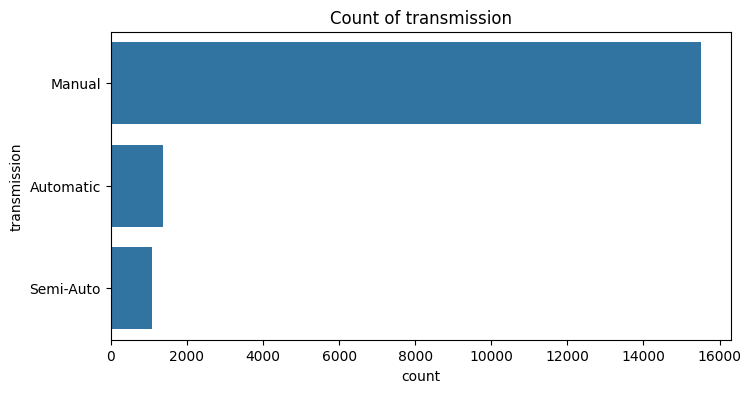


Value Counts for fuelType:
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


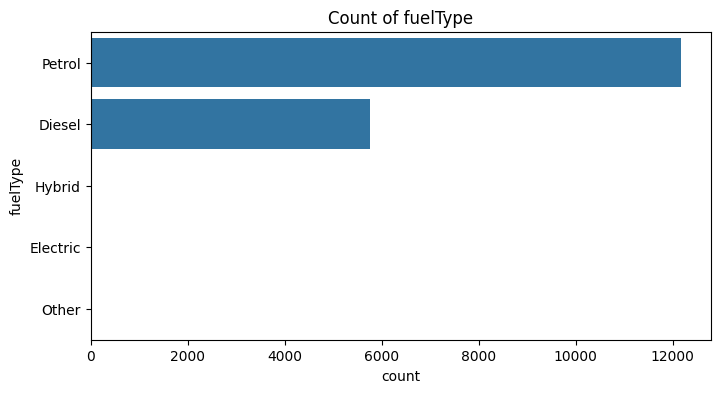

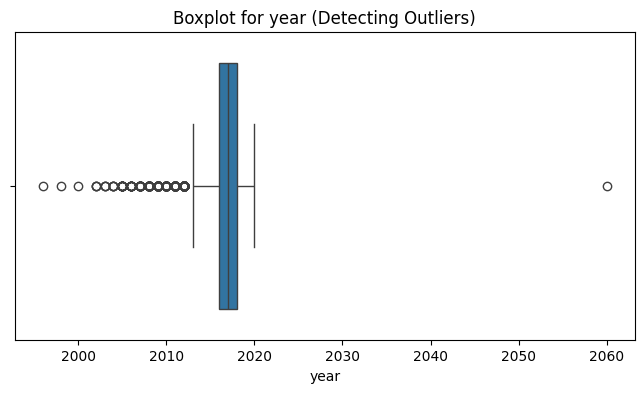

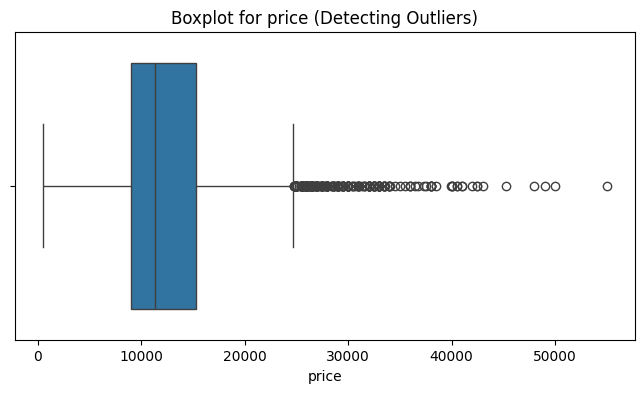

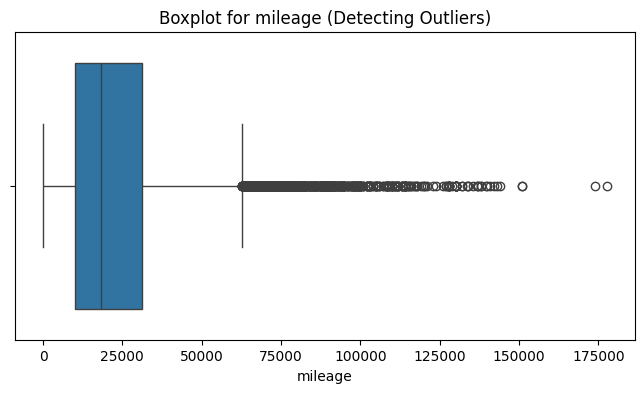

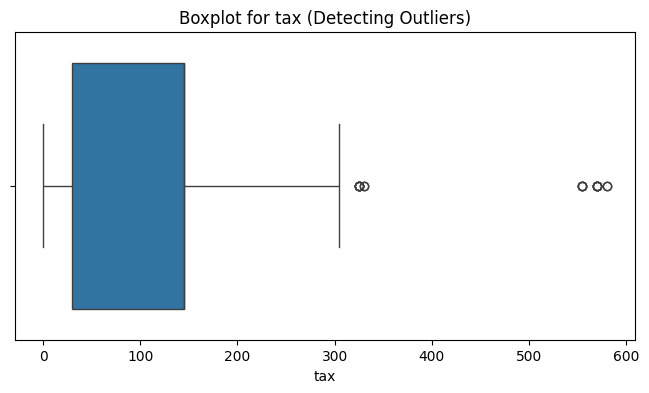

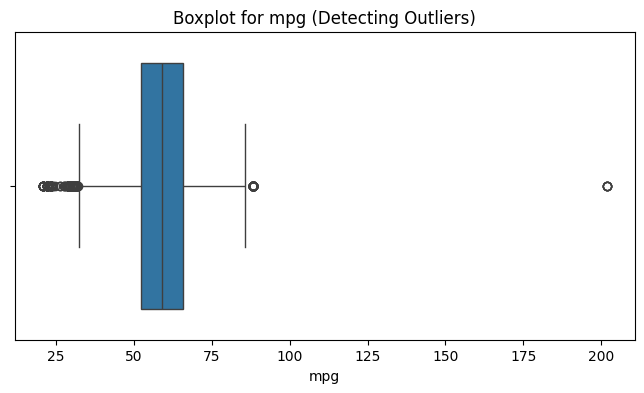

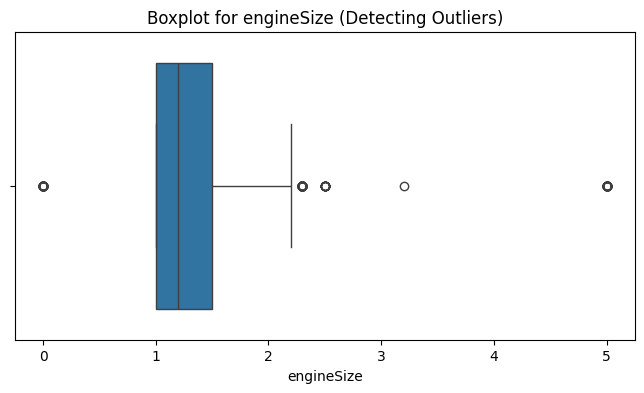



Original Data Shape: (17966, 9)
After Outlier Removal: (17170, 9)

MULTIVARIATE ANALYSIS:



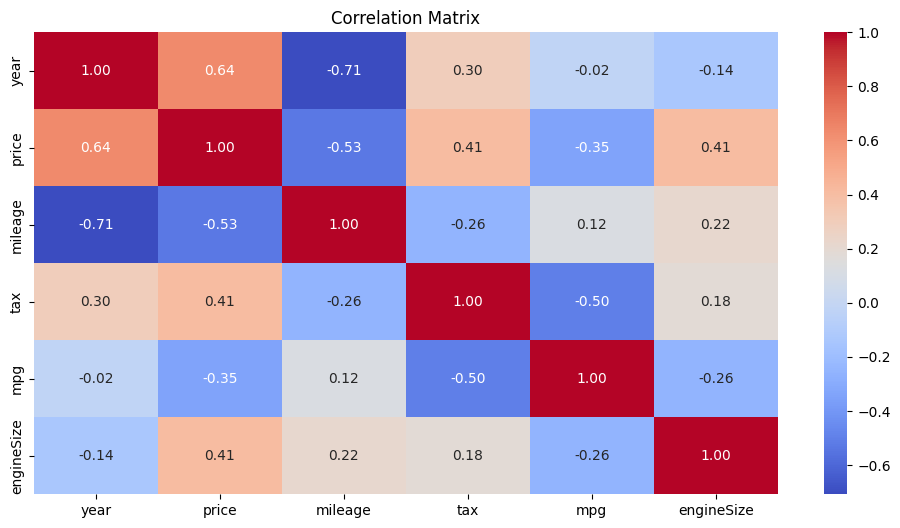

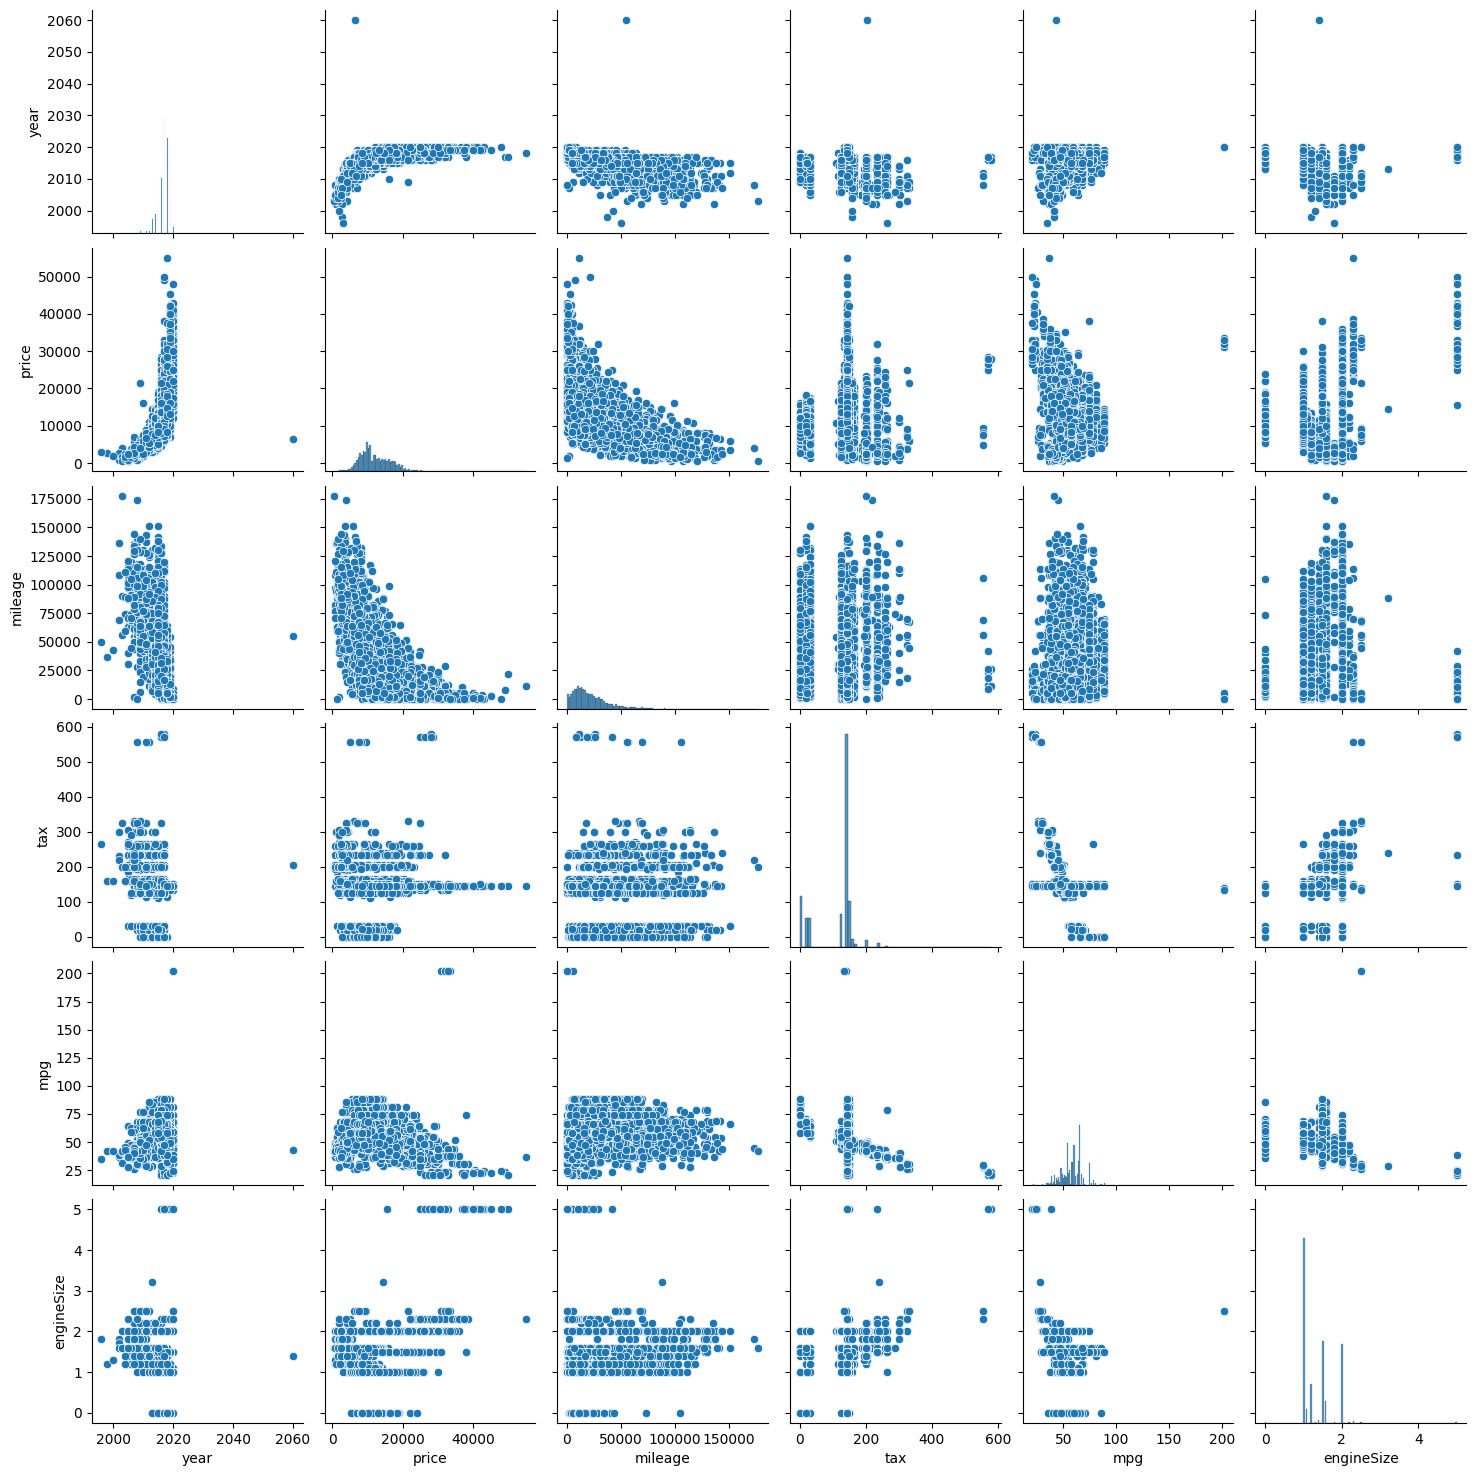

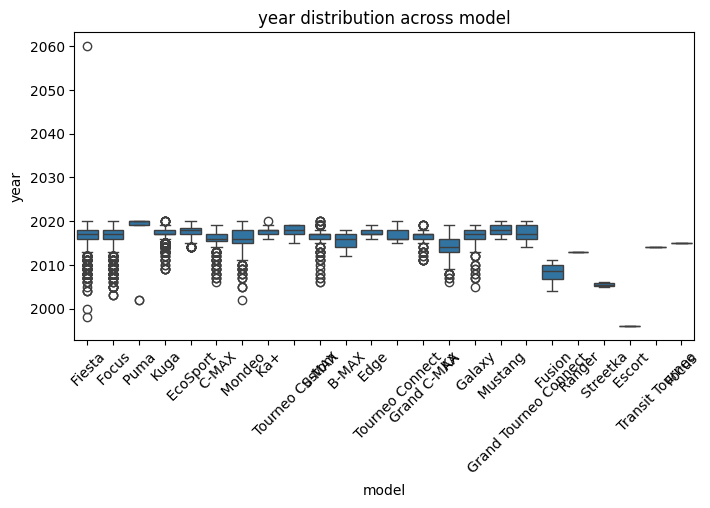

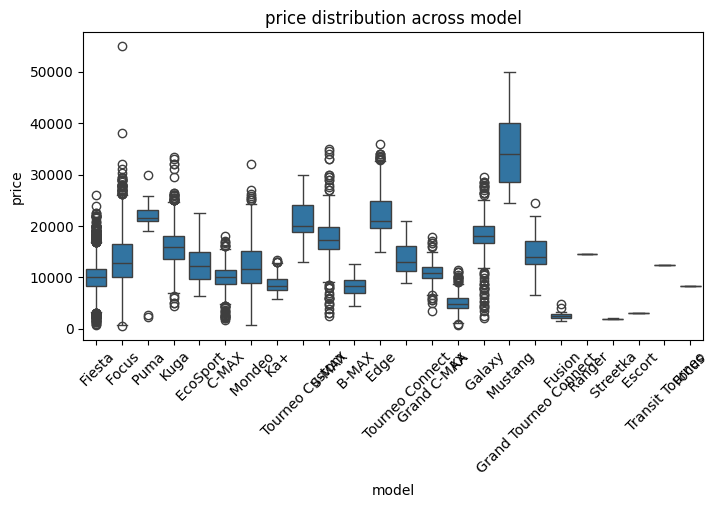

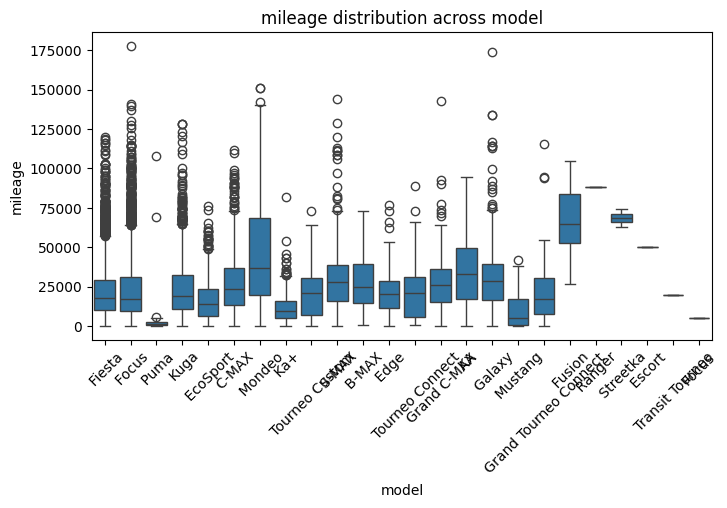

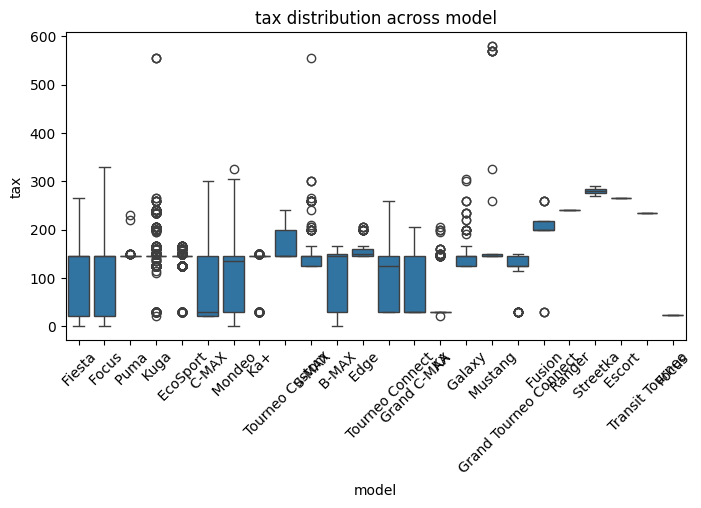

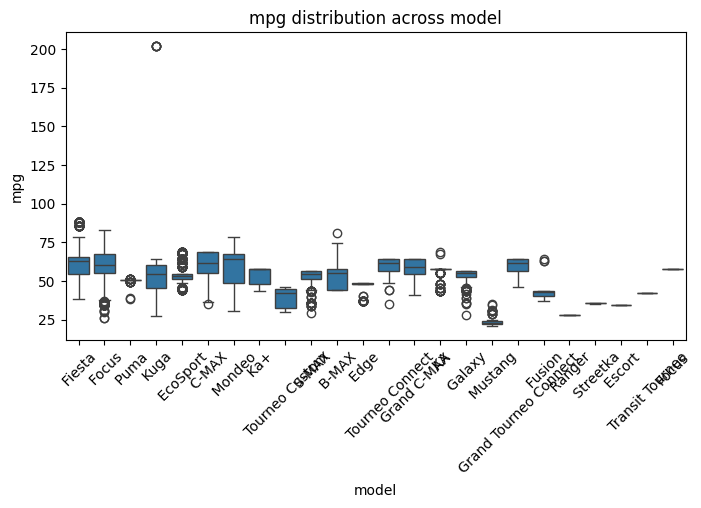

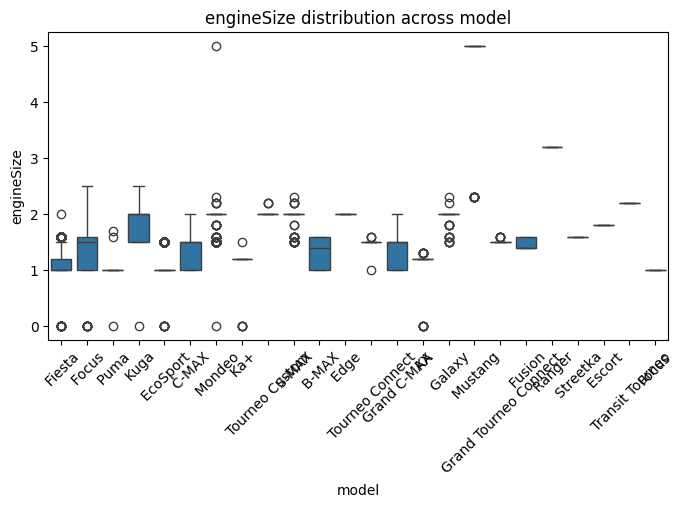

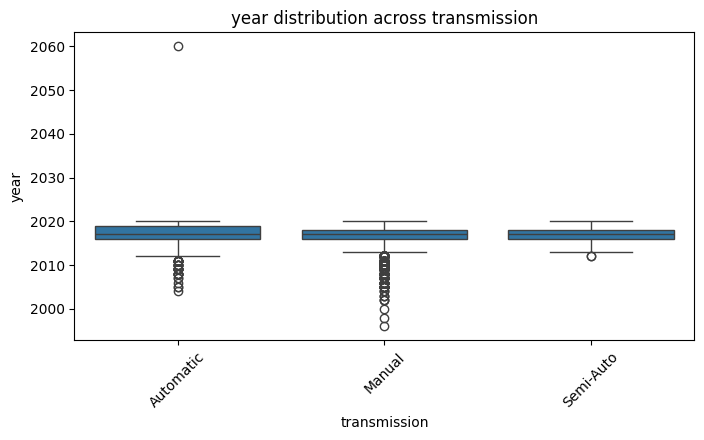

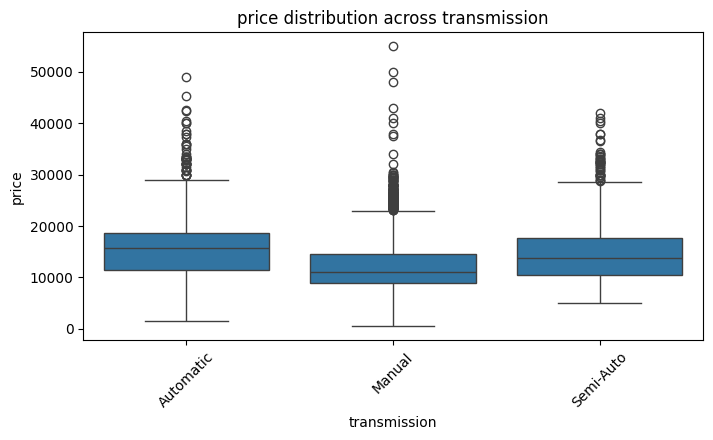

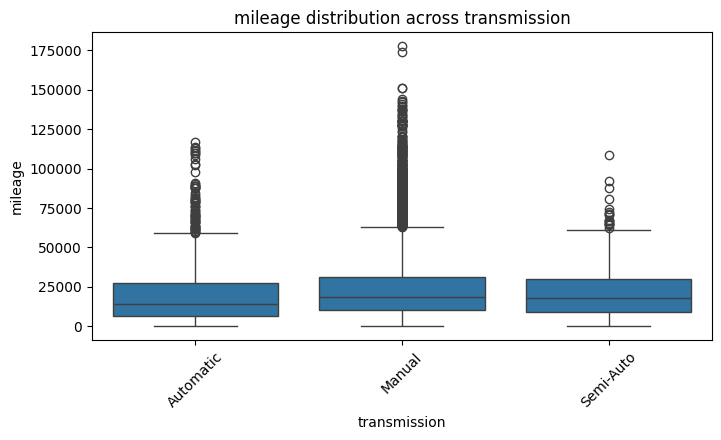

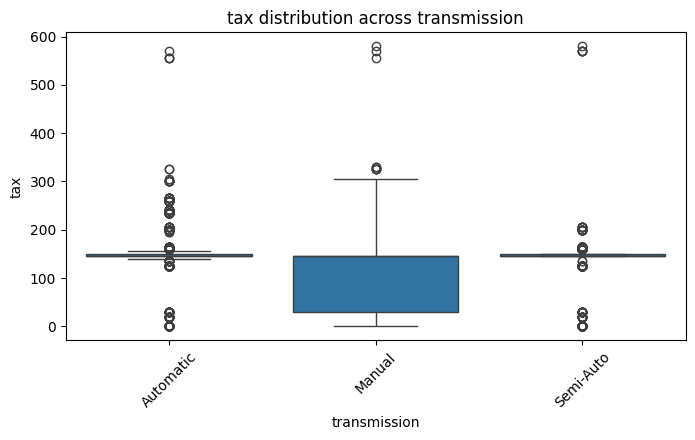

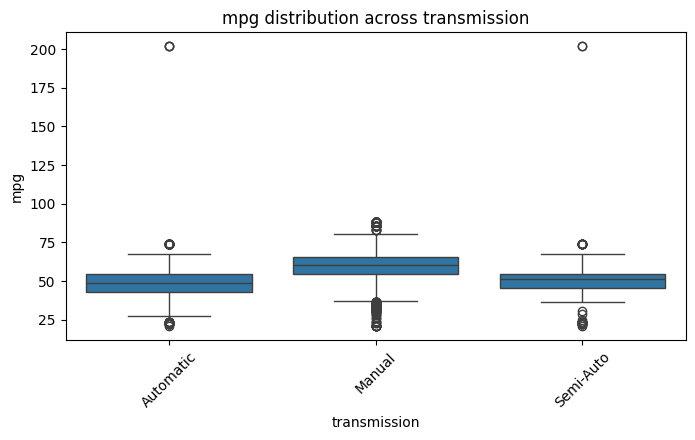

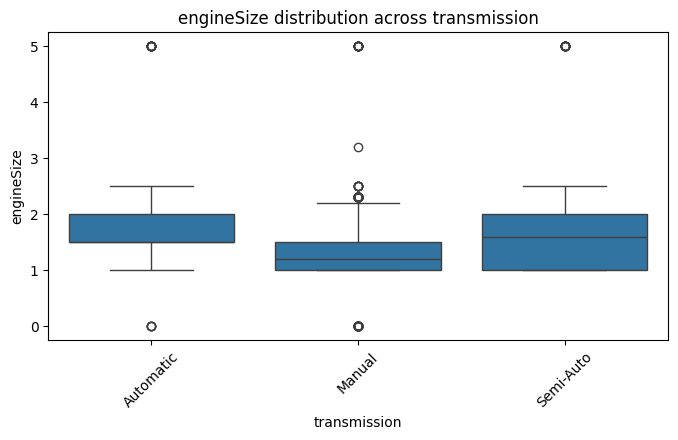

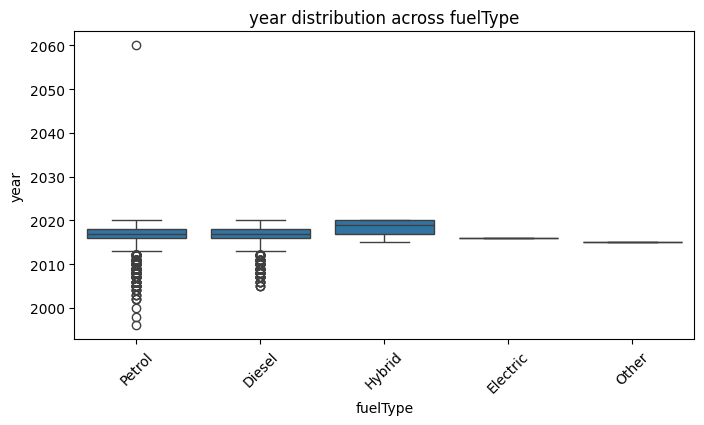

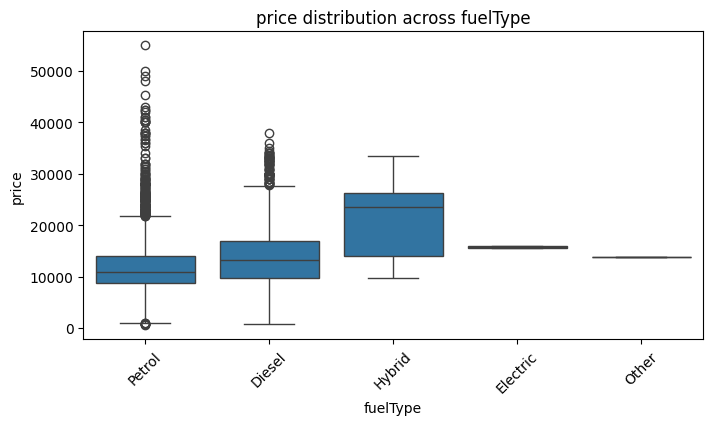

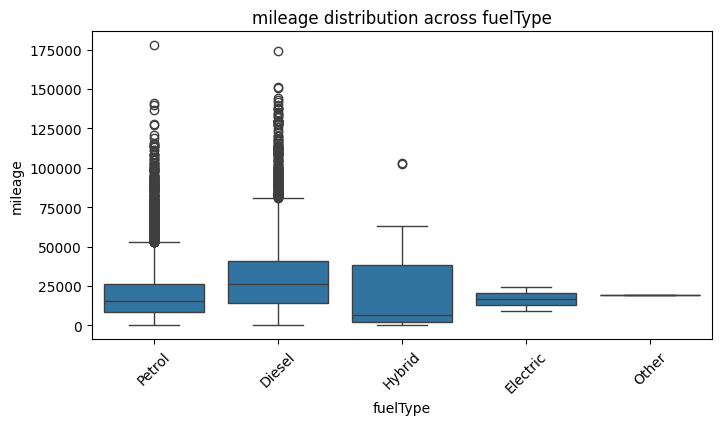

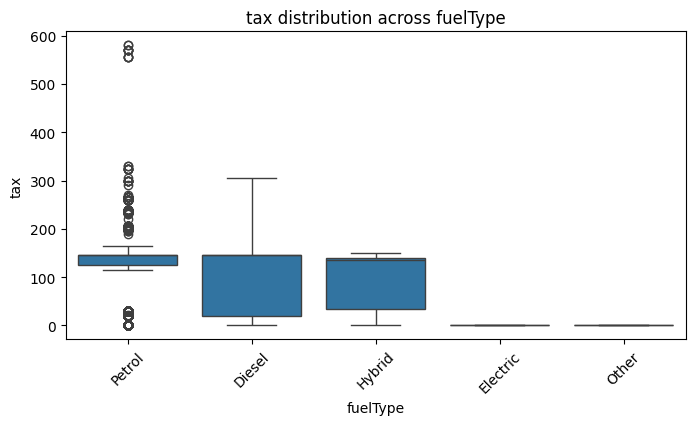

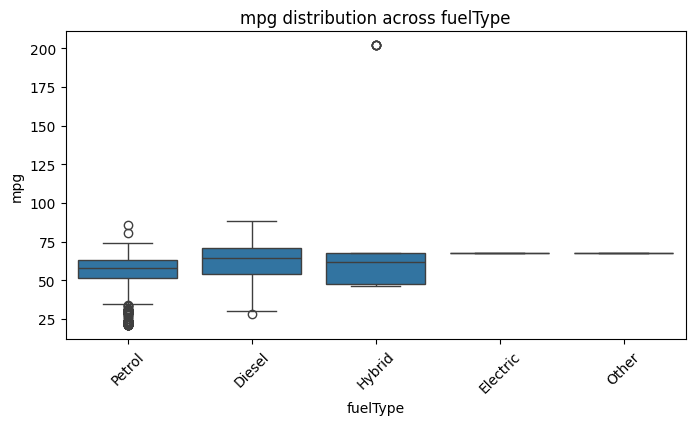

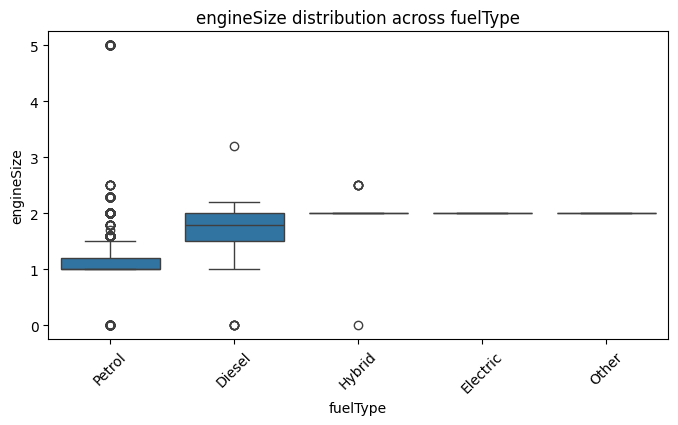


ADDITIONAL ANALYSIS:



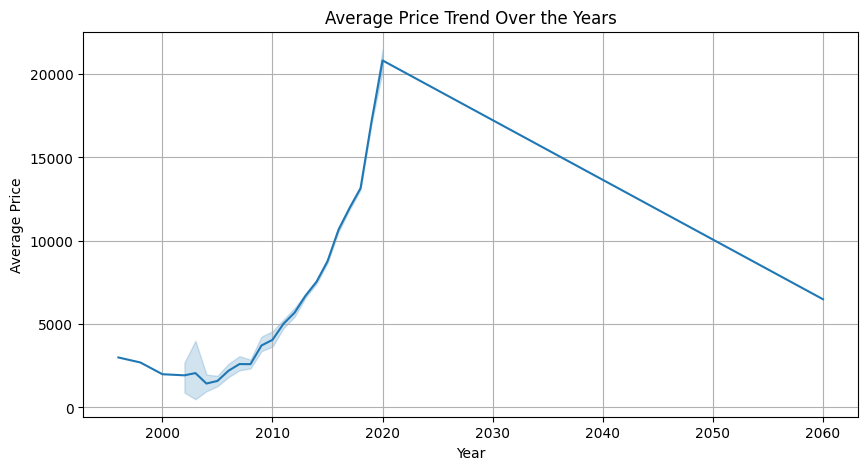

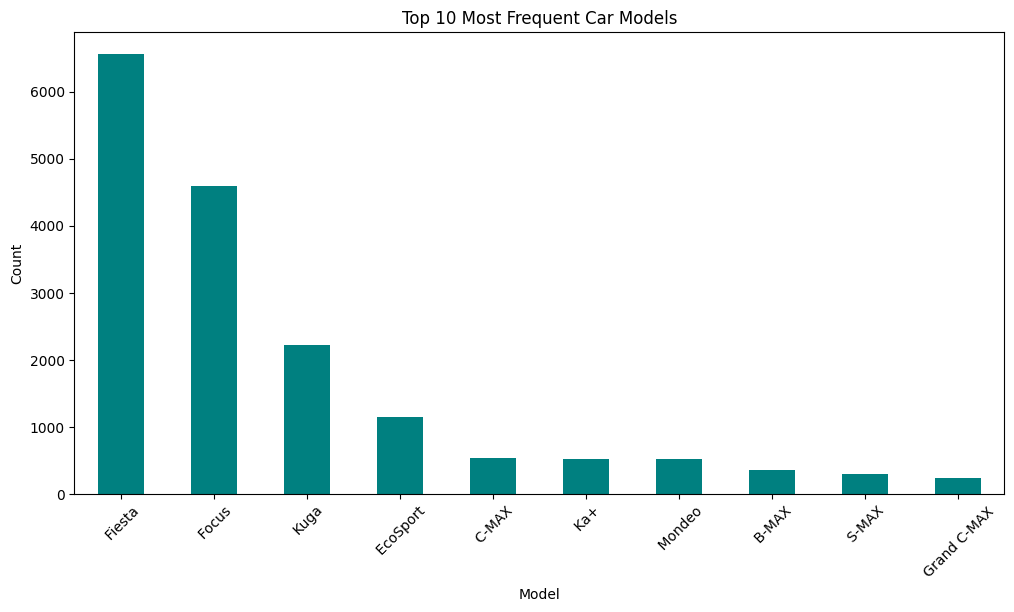

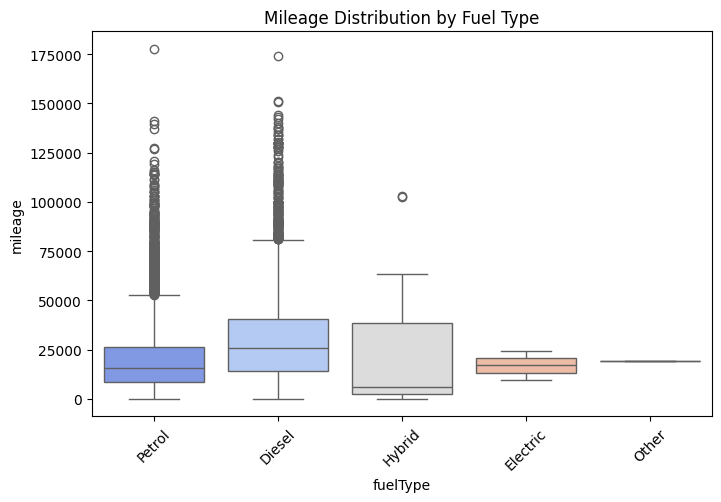

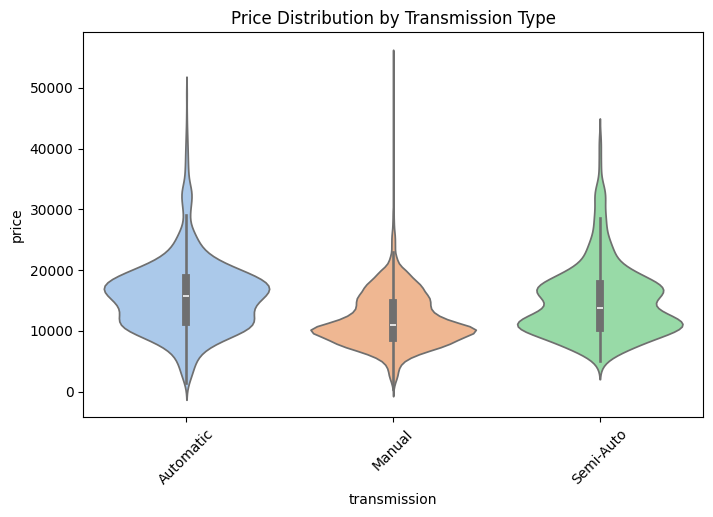

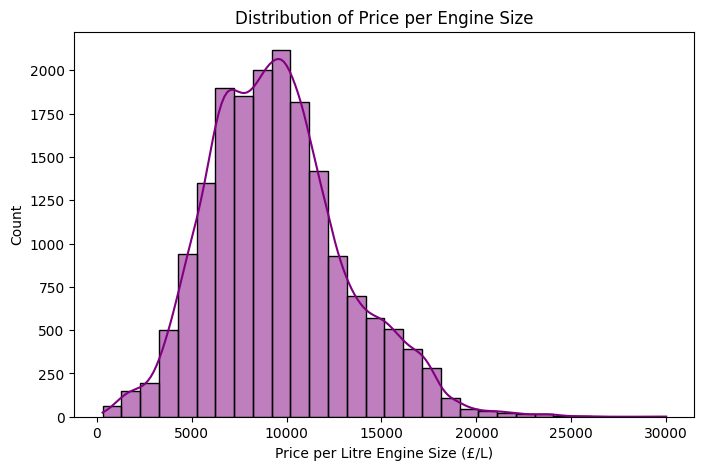


 Analysis Completed.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("/ford.csv")

# Display basic info
print("First five rows:")
print(df.head())
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))


#  UNIVARIATE ANALYSIS

# Numerical Columns
num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

for col in num_cols:
    print(f"\nStatistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical Columns
cat_cols = ['model', 'transmission', 'fuelType']

for col in cat_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

#  OUTLIER DETECTION
print()
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Detecting Outliers)')
    plt.show()
    print()

# Removing extreme outliers using Z-score (Threshold = 3)
df_no_outliers = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

print(f"\nOriginal Data Shape: {df.shape}")
print(f"After Outlier Removal: {df_no_outliers.shape}")
print()

#  MULTIVARIATE ANALYSIS
print("MULTIVARIATE ANALYSIS:")
print()
# Correlation Heatmap (only numerical columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
print()
# Pairplot for numerical variables
if len(num_cols) > 1:
    sns.pairplot(df[num_cols])
    plt.show()
print()
# Boxplot: Distribution of Numerical Variables by Categorical Variables
for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.xticks(rotation=45)
        plt.title(f'{num_col} distribution across {cat_col}')
        plt.show()
        print()

#  ADDITIONAL ANALYSIS
print("ADDITIONAL ANALYSIS:")
print()
# Price Trends Over the Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="price", estimator='mean')
plt.title("Average Price Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid()
plt.show()
print()
# Top 10 Most Frequent Car Models
plt.figure(figsize=(12, 6))
df["model"].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title("Top 10 Most Frequent Car Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print()
# Fuel Type vs. Mileage (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="fuelType", y="mileage", hue="fuelType", palette="coolwarm", legend=False)
plt.title("Mileage Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()
print()
# Transmission Type vs. Price (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="transmission", y="price", hue="transmission", palette="pastel", legend=False)
plt.title("Price Distribution by Transmission Type")
plt.xticks(rotation=45)
plt.show()
print()
# Feature Engineering: Creating Price per Engine Size
df["Price_per_Litre"] = df["price"] / df["engineSize"]
plt.figure(figsize=(8, 5))
sns.histplot(df["Price_per_Litre"], kde=True, bins=30, color="purple")
plt.title("Distribution of Price per Engine Size")
plt.xlabel("Price per Litre Engine Size (£/L)")
plt.show()
print()
print(" Analysis Completed.")
